In [1]:
import sys
sys.path.append('../src')

import requests

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

dt = cps_date()

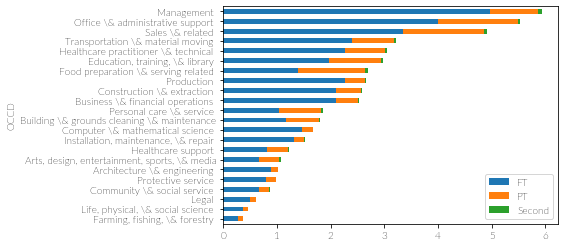

In [8]:
occs = {1   :  'Management occupations',
        2   :  'Business and financial operations occupations',
        3   :  'Computer and mathematical science occupations',
        4   :  'Architecture and engineering occupations',
        5   :  'Life, physical, and social science occupations',
        6   :  'Community and social service occupations',
        7   :  'Legal occupations',
        8   :  'Education, training, and library occupations',
        9   :  'Arts, design, entertainment, sports, and media',
        10  :  'Healthcare practitioner and technical occupations',
        11  :  'Healthcare support occupations',
        12  :  'Protective service occupations',
        13  :  'Food preparation and serving related occupations',
        14  :  'Building and grounds cleaning and maintenance',
        15  :  'Personal care and service occupations',
        16  :  'Sales and related occupations',
        17  :  'Office and administrative support occupations',
        18  :  'Farming, fishing, and forestry occupations',
        19  :  'Construction and extraction occupations',
        20  :  'Installation, maintenance, and repair occupations',
        21  :  'Production occupations',
        22  :  'Transportation and material moving occupations'}

cols = ['MONTH', 'YEAR', 'LFS', 'PWSSWGT', 'OCCD', 'OCC2D', 'WORKFT', 'COW1', 'COW2']

df = cps_12mo(cps_dir, dt, cols)

df['OCCD'] = df['OCCD'].map(occs)
df['OCC2D'] = df['OCC2D'].map(occs)

data = pd.DataFrame()

data['FT'] = df.query('WORKFT == 1').groupby('OCCD').PWSSWGT.sum() / df.PWSSWGT.sum() * 100
data['PT'] = df.query('WORKFT == 0').groupby('OCCD').PWSSWGT.sum() / df.PWSSWGT.sum() * 100
data['Second'] = df.groupby('OCC2D').PWSSWGT.sum() / df.PWSSWGT.sum() * 100

data['Total'] = data.sum(axis=1)

data.index = data.index.str.replace('occupations', '').str.replace('and', '\&')

data = data.sort_values('Total')
data.drop('Total', axis=1).to_csv(data_dir / 'occs.csv', sep=';', index_label='name', header=True)

data.drop('Total', axis=1).plot(kind='barh', stacked=True);

data1 = data.drop('Total', axis=1)

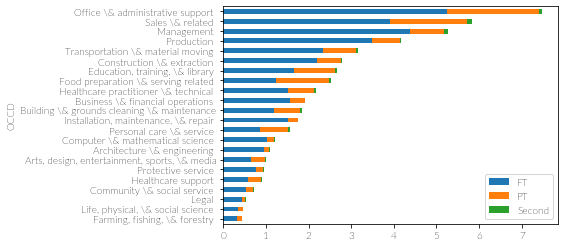

In [20]:
df = cps_12mo(cps_dir, pd.to_datetime('2000-12-01'), cols)


df['OCCD'] = df['OCCD'].map(occs)
df['OCC2D'] = df['OCC2D'].map(occs)

data = pd.DataFrame()

data['FT'] = df.query('WORKFT == 1').groupby('OCCD').PWSSWGT.sum() / df.PWSSWGT.sum() * 100
data['PT'] = df.query('WORKFT == 0').groupby('OCCD').PWSSWGT.sum() / df.PWSSWGT.sum() * 100
data['Second'] = df.groupby('OCC2D').PWSSWGT.sum() / df.PWSSWGT.sum() * 100

data['Total'] = data.sum(axis=1)

data.index = data.index.str.replace('occupations', '').str.replace('and', '\&')

data = data.sort_values('Total')

data.drop('Total', axis=1).plot(kind='barh', stacked=True);

data2 = data.drop('Total', axis=1)

In [21]:
data1 - data2

,FT,PT,Second
OCCD,,,
Architecture \& engineering,-0.049305,-0.014843,-0.000141
"Arts, design, entertainment, sports, \& media",0.022807,0.040692,0.000848
Building \& grounds cleaning \& maintenance,-0.020200,0.003280,-0.010294
Business \& financial operations,0.538967,0.057054,0.000460
Community \& social service,0.122439,0.028228,0.000954
Computer \& mathematical science,0.438845,0.028851,0.000520
Construction \& extraction,-0.095635,-0.095736,-0.006344
"Education, training, \& library",0.302417,0.008657,0.008748
"Farming, fishing, \& forestry",-0.037789,-0.031225,-0.004462
